In [1]:
cd D:\Darvin\python training

D:\Darvin\python training


In [71]:
import pandas as pd
data=pd.read_csv('hr_analytics.csv')
data.head(1)

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,94,3,4,5993,19479,8,11,1,8,0,1,6,4,0,5


In [72]:
from sklearn.cluster import KMeans
d_measure=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++')
    kmean.fit(data)
    d_measure.append(kmean.inertia_)

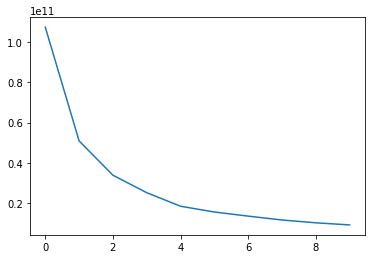

In [73]:
import matplotlib.pyplot as plt
plt.plot(d_measure)

In [74]:
kmean=KMeans(n_clusters=4).fit(data)
data['cluster']=kmean.labels_
center=kmean.cluster_centers_
import numpy as np
unique, counts = np.unique(kmean.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 398, 1: 442, 2: 444, 3: 186}


In [75]:
center=pd.DataFrame(center)
center

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,35.110553,804.349246,9.216080,2.743719,65.298995,2.706030,2.726131,4459.434673,14292.552764,2.505025,15.125628,2.721106,8.675879,2.706030,2.788945,5.517588,3.520101,1.623116,3.545226
1,36.244344,790.330317,9.527149,2.717195,66.237557,2.717195,2.746606,5652.095023,22637.156109,2.665158,15.244344,2.692308,10.285068,2.911765,2.739819,6.436652,4.156109,2.022624,3.882353
2,35.177928,809.513514,9.074324,2.698198,66.153153,2.731982,2.727477,4968.085586,6157.563063,2.554054,15.319820,2.695946,9.229730,2.801802,2.752252,6.373874,4.060811,1.977477,4.020270
3,46.586022,810.607527,8.629032,2.741935,65.709677,2.806452,2.693548,16561.279570,14044.327957,3.494624,15.043011,2.779570,24.107527,2.725806,2.774194,13.069892,6.322581,4.290323,6.177419


In [76]:
data.head(1)

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
0,41,1102,1,2,94,3,4,5993,19479,8,11,1,8,0,1,6,4,0,5,1


In [77]:
from sklearn.metrics import silhouette_score
x=data.drop(['cluster'],axis=1)
silhouette_score(x,kmean.labels_)

0.41708924775464623

In [78]:
data.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
RelationshipSatisfaction    int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
cluster                     int32
dtype: object

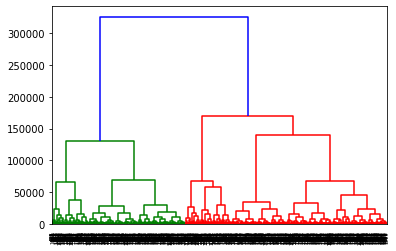

In [79]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.show()

In [80]:
from sklearn.cluster import AgglomerativeClustering 
heri_clu=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
model=heri_clu.fit(x)

In [82]:
cluster=model.labels_
from sklearn.metrics import silhouette_score
silhouette_score(x,cluster)

0.33163103143859707